# Import Libraries

In [21]:
import pickle
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences

# Raad Tokenizer and Model

In [22]:
with open('/content/drive/MyDrive/Colab Notebooks/SERAJ/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [23]:
loaded_model = keras.saving.load_model("/content/drive/MyDrive/Colab Notebooks/SERAJ/model.keras")

# Mahdi Function

In [24]:
def Mahdi_sheykhi_Model(text):

  d = {'Text': text}
  df = pd.DataFrame(data=d, index=[0])

  encoded = tokenizer.texts_to_sequences(df['Text'])

  X = pad_sequences(encoded, maxlen=50, padding='post')

  prob = loaded_model.predict(X)
  res = {'neither':prob[0][0], 'racist':prob[0][1], 'hate_speech':prob[0][2], 'offensive_language':prob[0][3], 'Xenophobia':prob[0][4]}
  df_result = pd.DataFrame(data=res, index=[0])

  plt.figure(figsize=(7,2))
  sns.heatmap(df_result, cmap='Blues', annot=True)
  plt.show()

# Testing

In [25]:
text = 'youre acting like a nazi hispanic girl'

1/1 [==============================] - 0s 302ms/step


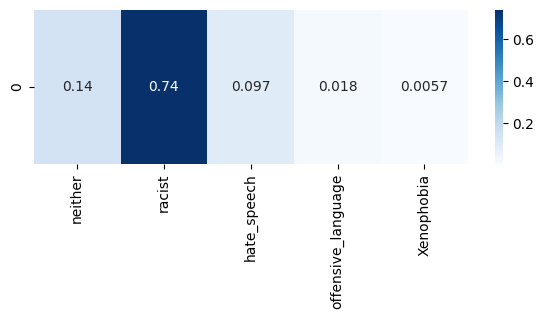

In [26]:
Mahdi_sheykhi_Model(text)

In [27]:
text = 'Funny how everyone suddenly gives a shit about a disease when white people start dying'

1/1 [==============================] - 0s 31ms/step


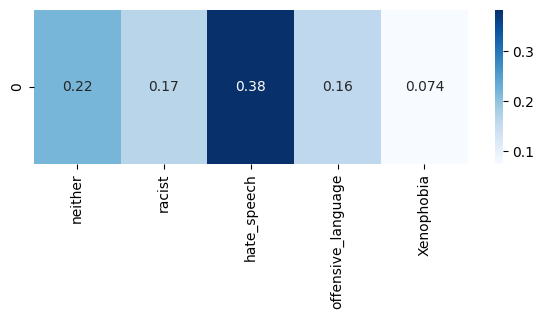

In [28]:
Mahdi_sheykhi_Model(text)

In [29]:
text = 'This nigga ugly as fuck. He looks 9'

1/1 [==============================] - 0s 33ms/step


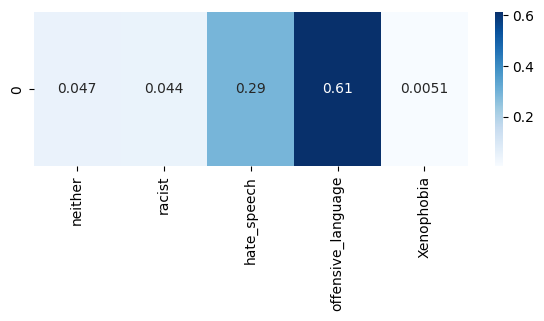

In [30]:
Mahdi_sheykhi_Model(text)